# Parametrización Tanh

In [1]:
%matplotlib inline
import emcee
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op
from model_fit import *
import corner as corner
import seaborn as sb

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
sb.set_style('white')

In [3]:
model = 'tanh'

In [4]:
direct='/Users/Oleg/Documents/21cm_analysis/'

Los valores reales que se utilizaron para generar del dataset6 son:

Temperatura de brillo: 1., 10., 1.5, 15., 18.5, 3.7, 1000., 8., 3.

Foreground: 7.5, -2.55, 0.1, 0.05


In [5]:
freqs, temp, err = np.loadtxt(direct+'dataset6.txt', unpack = True)

In [6]:
priors = np.array([-2.,0.1, 0.,20., 0.,5., 1.,4., 0.,20., 0.,5., 0.,25., 0,30., 0.,5., 0.,10, -10.,0., -4.,1.,-4.,1.])

Finding the mid point for each prior

In [7]:
ndim = np.size(priors)/2

In [8]:
print ndim

13


In [9]:
mid = np.zeros(ndim)

In [10]:
for i in range(ndim):
    mid[i] = priors[2*i] + priors[2*i + 1]

In [11]:
mid *= 0.5

Aquí se calcula el máximo likelihood. Estimación de parámetros

In [12]:
fun = lambda *args: -lnhood(*args)

In [13]:
result = op.minimize(fun, mid, args=(model,temp, freqs, err), method = 'L-BFGS-B')

In [14]:
print result.x

[ -0.95006162   9.99999383   2.50000251   2.5003496   10.00008494
   2.50011802  12.50001283  14.99996633   2.49997158   7.49999268
  -2.54997509   0.10001492   0.04990456]


In [15]:
fore = foreground(freqs)
T_gx2 = fore(round(result.x[9],3),round(result.x[10],3),round(result.x[11],3),round(result.x[12],3))

In [16]:
t_b2 = (temp - T_gx2)

Comparación entre los datos sintéticos y el resultado de la estimación anterior

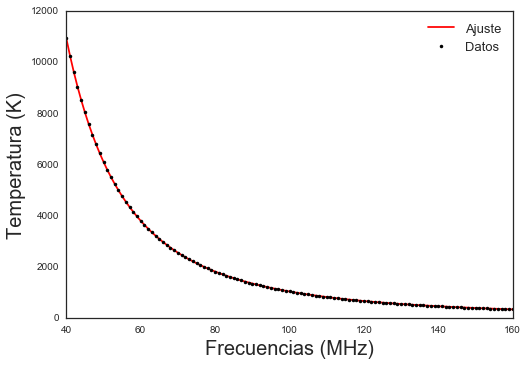

In [17]:
fig1=plt.figure(1)
plt.plot(freqs,T_gx2,'r',label='Ajuste')
plt.plot(freqs,temp,'.k',label='Datos')
plt.legend(loc='best',fontsize=13)
plt.xlabel('Frecuencias (MHz)', fontsize=20)
plt.ylabel('Temperatura (K)', fontsize=20)

In [19]:
nwalkers = 800

In [20]:
b_steps, steps = 1000, 2000 

In [21]:
z = np.zeros((ndim, nwalkers))

In [22]:
h = 1e-2

In [23]:
rpos=[]

In [24]:
for i in range(ndim):
    z[i,:] = result.x[i] + h*np.random.randn(nwalkers)

In [25]:
for i in range(nwalkers):
    rpos.append(np.array([z[0,i],z[1,i],z[2,i],z[3,i],z[4,i],z[5,i],z[6,i],z[7,i],z[8,i],z[9,i],z[10,i],z[11,i],z[12,i]]))

start of the burn in phase

In [26]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(model, temp, freqs, err, priors), threads=2)

In [27]:
pos, prob, state = sampler.run_mcmc(rpos, b_steps)

In [28]:
sampler.reset()

In [29]:
_,_,_=sampler.run_mcmc(pos, steps,rstate0=state)

In [30]:
sampler.acceptance_fraction.mean()

0.15904125

In [31]:
#np.savetxt('/Users/Oleg/Desktop/tanh.txt',sampler.flatchain)
#data = np.loadtxt('/Users/Oleg/Desktop/tanh.txt')

In [32]:
label1 = [r'$log_{10}x_0$',r'$zx_0$',r'$x_0dz$']
label2 = [r'$log_{10}T_0$',r'$zT_0$',r'$T_0dz$']
label3 = [r'$J_0$',r'$zJ_0$',r'$J_0dz$']

/usr/local/lib/python2.7/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/usr/local/lib/python2.7/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


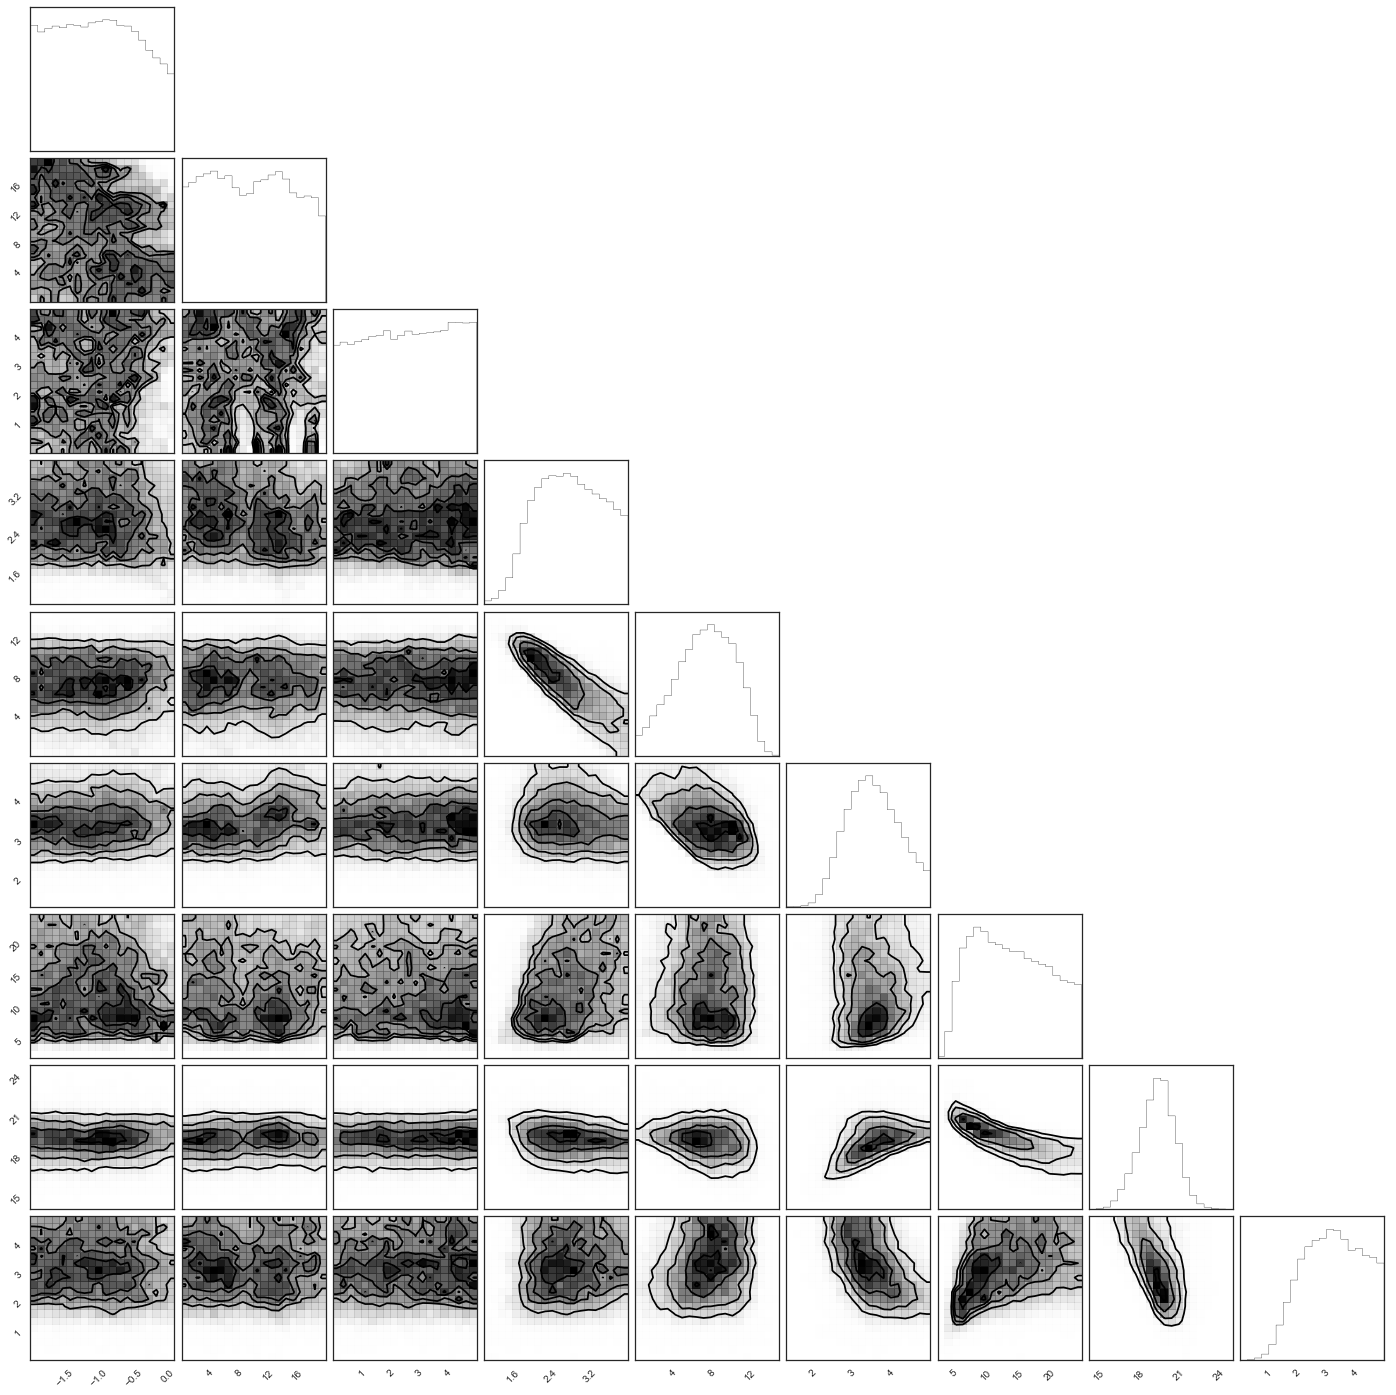

In [33]:
fig2 = corner.corner(sampler.flatchain[:,:9],plot_datapoints=False);

In [34]:
#fig3 = corner.corner(sampler.flatchain[:,3:6],plot_datapoints=False,labels=label2,label_kwargs={'fontsize':20},truths = [3.,9.,3.0]);

In [35]:
#fig4 = corner.corner(sampler.flatchain[:,6:9],plot_datapoints=False,labels=label3,label_kwargs={'fontsize':20},truths = [15.,18.5,3.7]);

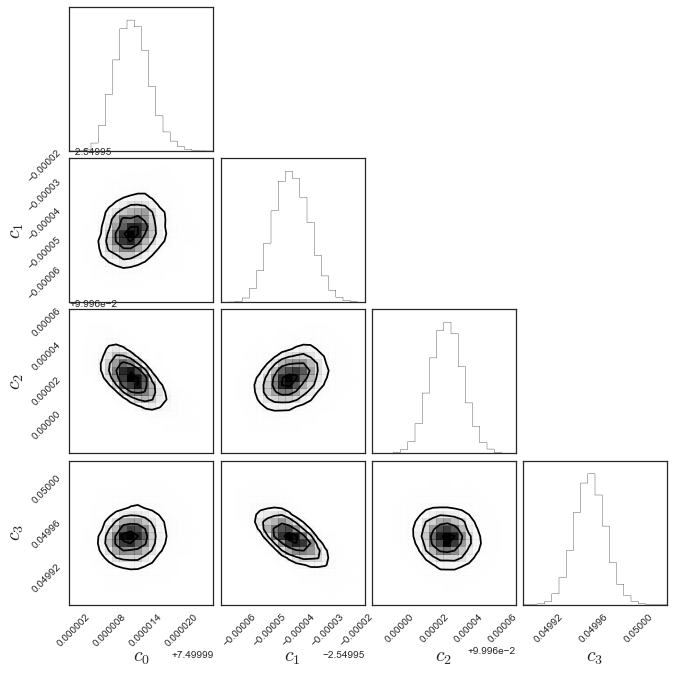

In [36]:
fig5 = corner.corner(sampler.flatchain[:,9:],plot_datapoints=False,labels=[r'$c_0$',r'$c_1$',r'$c_2$',r'$c_3$'],label_kwargs={'fontsize':20},truhts=[7.5, -2.55, np.log10(0.1), np.log10(0.05)]);

In [37]:
#fig2.savefig('/Users/Oleg/desktop/tanh_pars1.pdf')
#fig3.savefig(direct+'tanh_marg.pdf')
#fig2.savefig('/Users/Oleg/desktop/x_hi.pdf')
#fig3.savefig('/Users/Oleg/desktop/t_o.pdf')
#fig4.savefig('/Users/Oleg/desktop/j_0.pdf')
#fig5.savefig('/Users/Oleg/desktop/fores.pdf')

In [38]:
signal = model_21cm(freqs,model)

[ -1.00415475   9.67440473   2.57894687   2.77963239   7.29509574
   3.55261641  14.01402876  19.37082985   3.24402419]


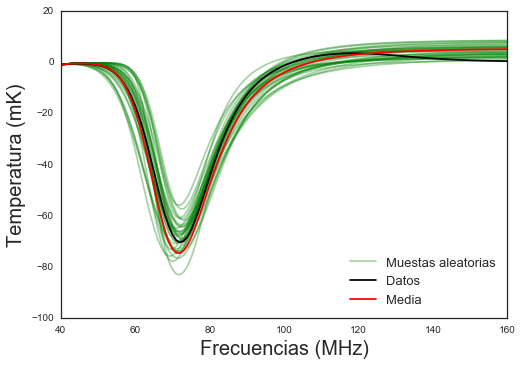

In [39]:
figm = plt.figure()
for x,zx,dx,t,zt,dt,j,zj,dj,c0,c1,c2,c3 in sampler.flatchain[np.random.randint(len(sampler.flatchain), size=30)]:
    fg1,=plt.plot(freqs,signal(x,zx,dx,t,zt,dt,j,zj,dj),'g', alpha=0.35)

mean_x = np.mean(sampler.flatchain[:,0])
mean_zx = np.mean(sampler.flatchain[:,1])
mean_dx = np.mean(sampler.flatchain[:,2])
mean_t = np.mean(sampler.flatchain[:,3])
mean_zt = np.mean(sampler.flatchain[:,4])
mean_dt = np.mean(sampler.flatchain[:,5])
mean_j = np.mean(sampler.flatchain[:,6])
mean_zj = np.mean(sampler.flatchain[:,7])
mean_dj = np.mean(sampler.flatchain[:,8])
mean_c0 = np.mean(sampler.flatchain[:,9])
mean_c1 = np.mean(sampler.flatchain[:,10])
mean_c2 = np.mean(sampler.flatchain[:,11])
mean_c3 = np.mean(sampler.flatchain[:,12])

mean_data = np.array([mean_x,mean_zx,mean_dx,mean_t,mean_zt,mean_dt,mean_j,mean_zj,mean_dj])
print mean_data
Tb2 = signal(0.,10.,1.5,3.0,8.0,3.0,15.,18.5,3.7)
fg2,=plt.plot(freqs,Tb2,'k')
fg3,=plt.plot(freqs, signal(mean_x,mean_zx,mean_dx,mean_t,mean_zt,mean_dt,mean_j,mean_zj,mean_dj), 'r')
#fg4, = plt.plot(frqs, (T_sky-fore(mean_c1, mean_c2, mean_c3))*1000.,'k')
plt.legend([fg1,fg2,fg3],['Muestas aleatorias','Datos', 'Media'],loc='best',fontsize=13)
plt.xlabel('Frecuencias (MHz)',fontsize=20)
plt.ylabel('Temperatura (mK)',fontsize=20)